# Breast Cancer Wisconsin (Diagnostic) Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(12, 8)})

## Data loading

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## Get Infomation about Data

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [4]:
print('Total rows:', df.shape[0])
print('Total features:', df.shape[1])

Total rows: 569
Total features: 33


In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Exploratory Data Analysis

Correlation between variables

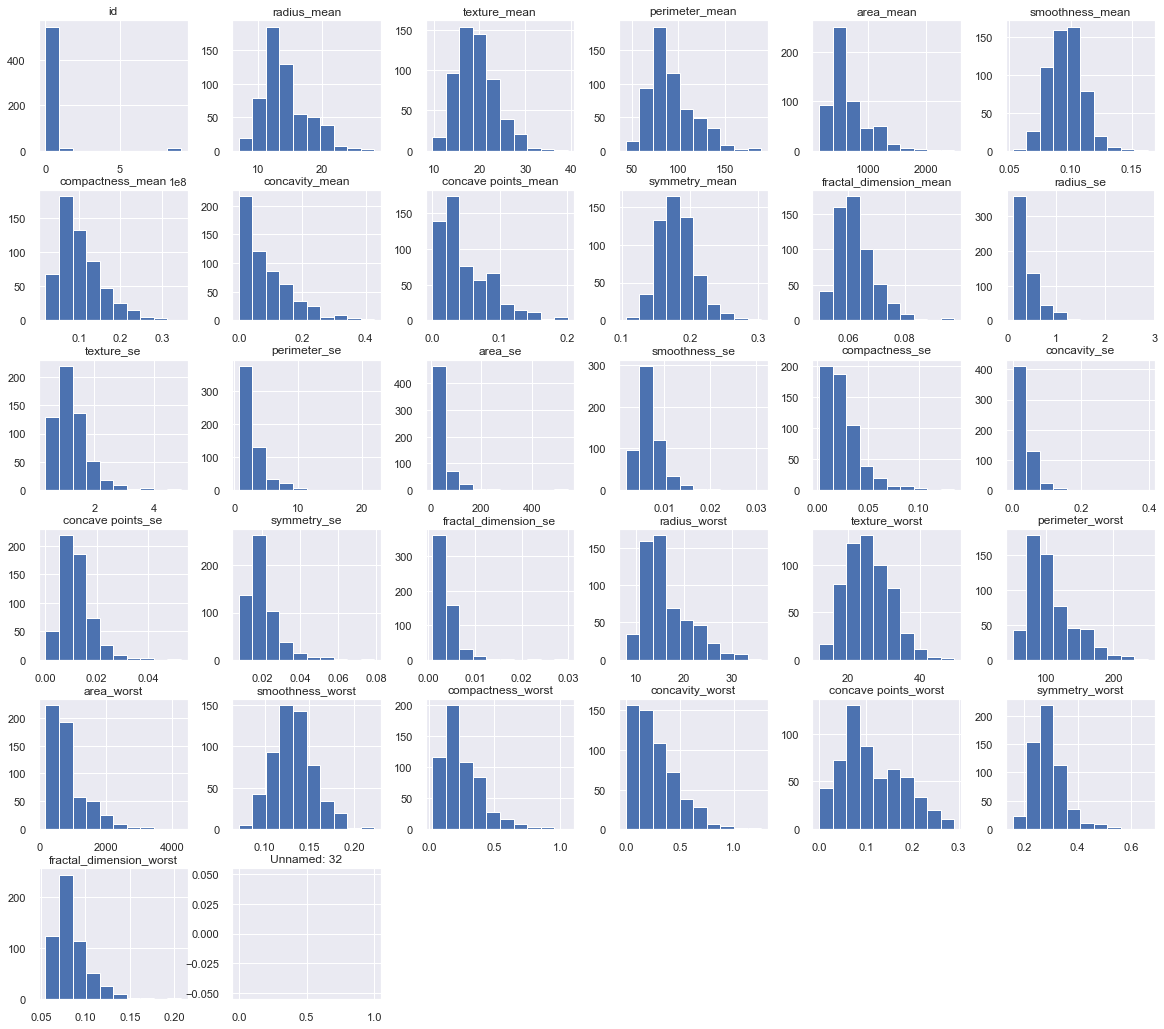

In [10]:
df.hist(figsize=(20,18));

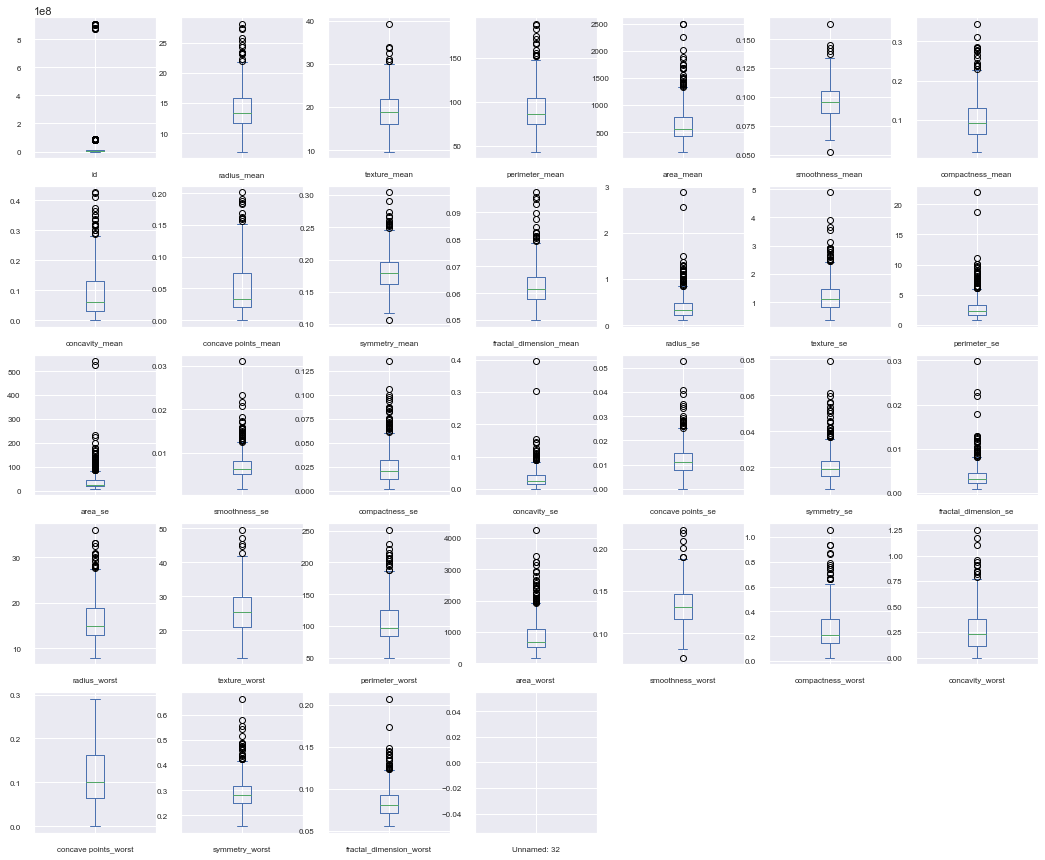

In [11]:
df.plot(kind='box', subplots=True, layout=(5,7), fontsize=8, figsize=(18,15));

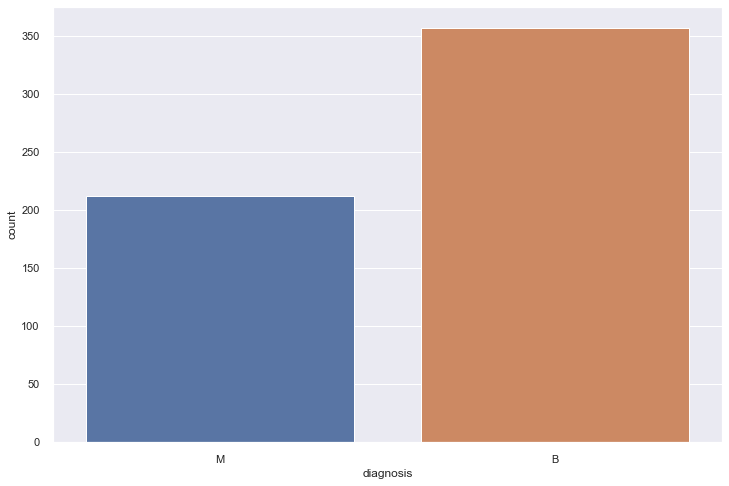

In [12]:
sns.countplot(x='diagnosis', data=df)
plt.show()

## Data Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [15]:
df['diagnosis'].unique()

array([1, 0])

Drop useless columns

In [16]:
df = df.drop(['id' ,'Unnamed: 32'],axis=1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Removing Outliers

In [17]:
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data = d.copy()
        data = data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1), np.round(loss,2)))

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df[df.columns]))
threshold(z,df[df.columns])

With threshold 3.0 data loss is 13.01%
With threshold 3.2 data loss is 10.72%
With threshold 3.4 data loss is 9.14%
With threshold 3.6 data loss is 7.73%
With threshold 3.8 data loss is 6.68%
With threshold 4.0 data loss is 5.98%
With threshold 4.2 data loss is 5.27%
With threshold 4.4 data loss is 4.39%
With threshold 4.6 data loss is 3.69%
With threshold 4.8 data loss is 2.99%


In [19]:
features_clear = df[(z<4.4).all(axis = 1)]

In [20]:
df.shape[0]

569

In [21]:
features_clear.shape[0]

544

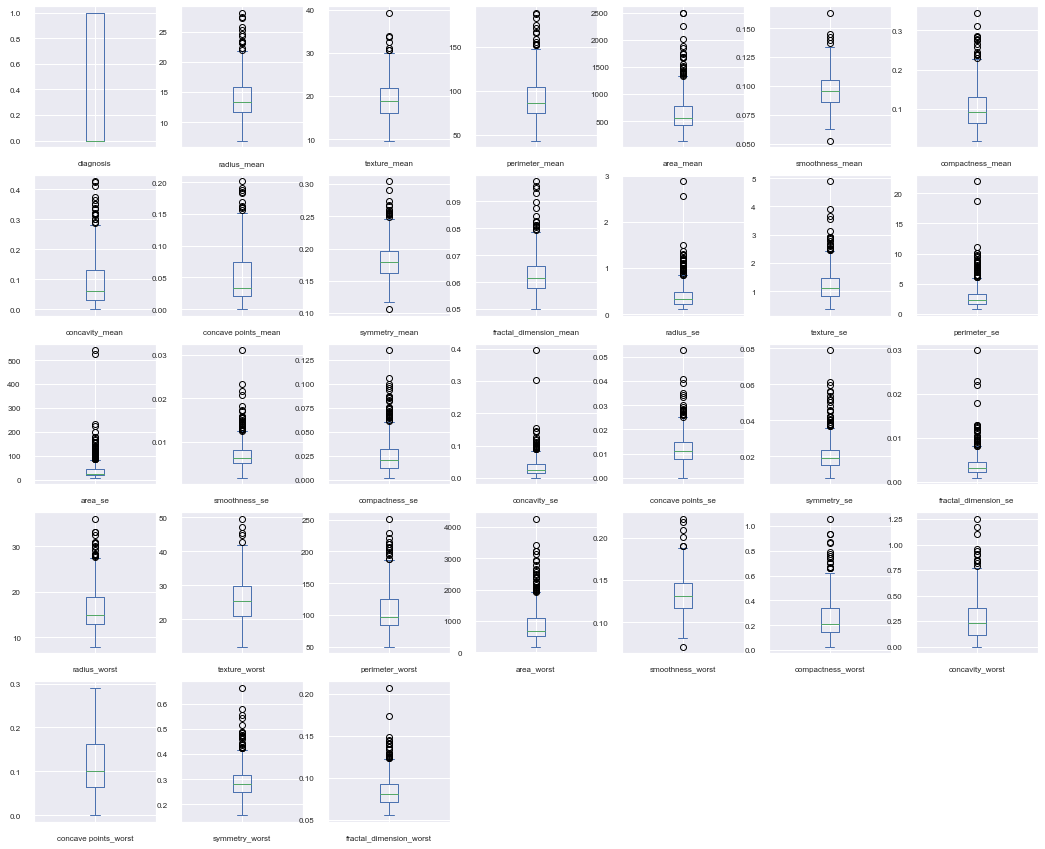

In [22]:
df.plot(kind='box', subplots=True, layout=(5,7), fontsize=8, figsize=(18,15));

Handling Numerical Values (Min Max Scaler)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = StandardScaler()
mx = MinMaxScaler()

In [24]:
# make a copy of dataframe
scaled_features_clear = features_clear.copy()

col_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
features = scaled_features_clear[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = mx.fit(features.values)
features = scaler.transform(features.values)

scaled_features_clear[col_names] = features

In [25]:
scaled_features_clear.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

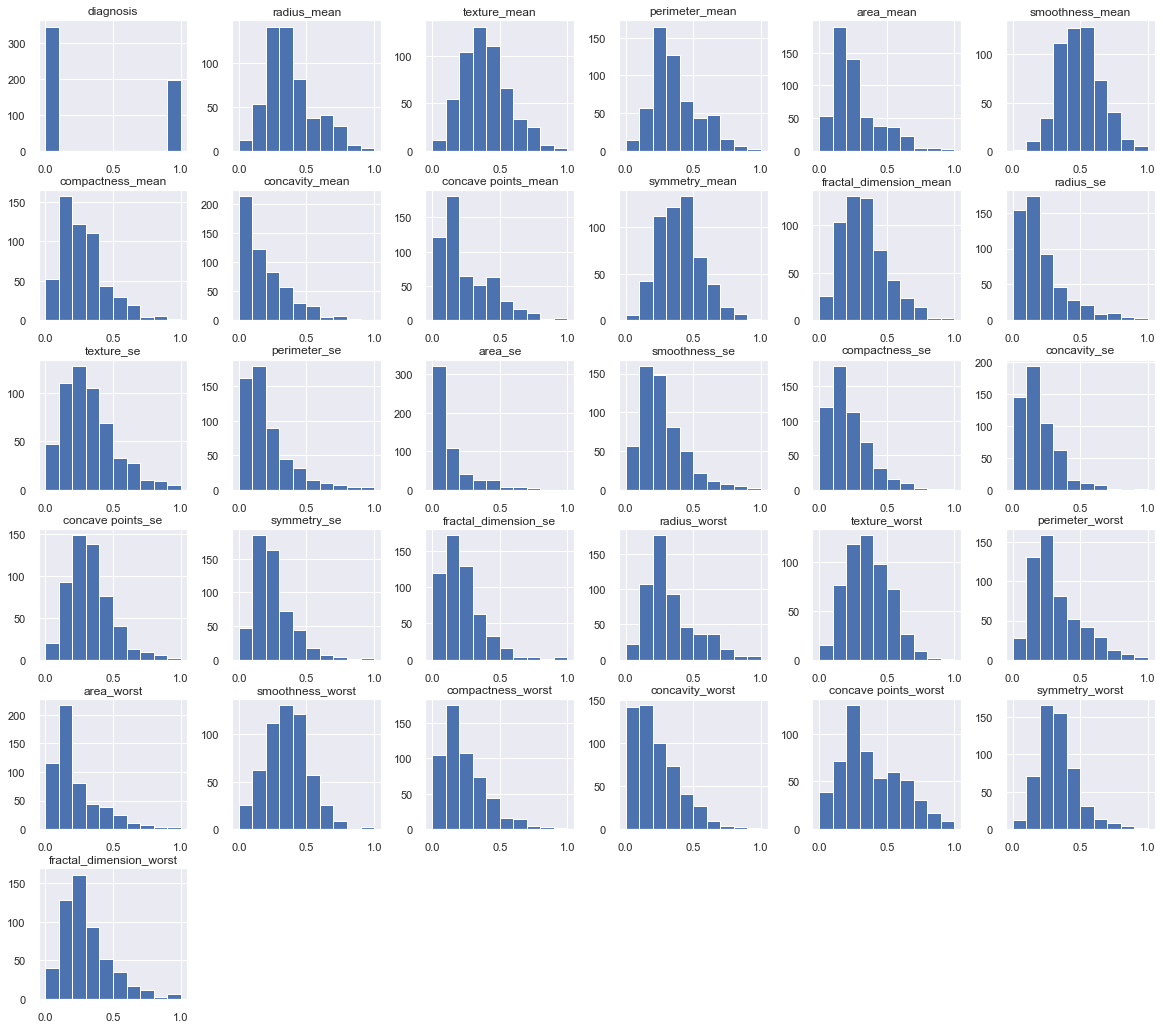

In [26]:
scaled_features_clear.hist(figsize=(20,18));

In [ ]:
cor_target = abs(scaled_features_clear.corr()['diagnosis'])

relevant_features = cor_target[cor_target>=0.7]
relevant_features

diagnosis               1.000000
radius_mean             0.739936
perimeter_mean          0.752889
area_mean               0.732501
concavity_mean          0.725110
concave points_mean     0.785203
radius_worst            0.786419
perimeter_worst         0.792962
area_worst              0.757442
concave points_worst    0.794288
Name: diagnosis, dtype: float64

In [ ]:
X = df[relevant_features.index[1:]].values
features = df[relevant_features.index[1:]].columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X, i) for i in range(len(X.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features)

,VIF
radius_mean,23697.570674
perimeter_mean,22770.722063
area_mean,520.720209
concavity_mean,21.718289
concave points_mean,50.309392
radius_worst,4665.499963
perimeter_worst,2263.680196
area_worst,546.130232
concave points_worst,35.233720


## Prepare data

In [27]:
data_vars = scaled_features_clear.columns.values.tolist()
y = ['diagnosis']
x = [i for i in data_vars if i not in y]

In [28]:
print("Label :", y)
print("Feature :",x)

Label : ['diagnosis']
Feature : ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Split Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features_clear[x], scaled_features_clear[y], test_size=0.3, random_state=12) 

In [31]:
print('Total Training Data:', x_train.shape[0])
print('Total Testing Data:', x_test.shape[0])

Total Training Data: 380
Total Testing Data: 164


## Model Data

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)


c:\Users\CenCom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

## Test Model

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0]


In [35]:
print(y_test)

     diagnosis
17           1
450          0
498          1
300          1
542          0
..         ...
399          0
43           1
462          0
567          1
541          0

[164 rows x 1 columns]


In [36]:
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

print('SUPORT VEKTOR MECHINE RESULT:')
print('======================================================')
print('Accuracy:', classifier.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

SUPORT VEKTOR MECHINE RESULT:
Accuracy: 0.9710526315789474
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       246
           1       0.98      0.93      0.96       134

    accuracy                           0.97       380
   macro avg       0.97      0.96      0.97       380
weighted avg       0.97      0.97      0.97       380

Confussion Matrix ------------------------------------
[[244   2]
 [  9 125]]


In [37]:
print('\n SUPORT VEKTOR MECHINE TESTING RESULT:')
print('======================================================')
print('Accuracy:', classifier.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))


 SUPORT VEKTOR MECHINE TESTING RESULT:
Accuracy: 0.9817073170731707
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.98      0.97      0.98        64

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164

Confussion Matrix ------------------------------------
[[99  1]
 [ 2 62]]


<AxesSubplot:>

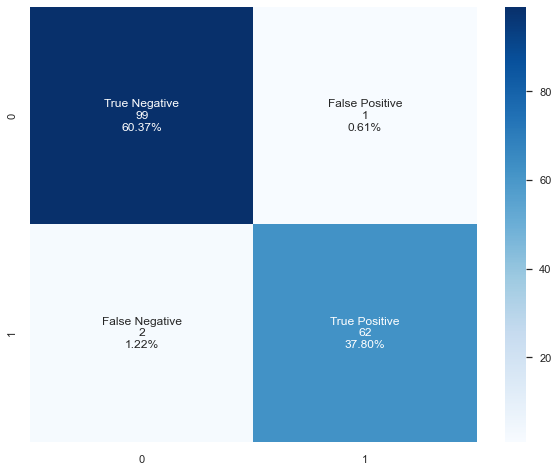

In [38]:
y_pred = classifier.predict(x_test) 
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')